In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

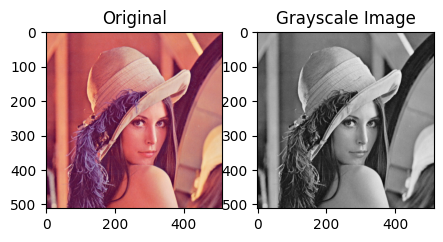

In [2]:
img = cv2.imread(r"C:\Users\WIN\Desktop\image_lab\Lena.jpg")
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
im = img.copy()
gsi = grayImg.copy()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5,10))
ax1.set_title('Original')
ax1.imshow(img[:,:,::-1])
ax2.set_title('Grayscale Image')
ax2.imshow(grayImg,cmap='gray')

cv2.waitKey(0)
cv2.destroyAllWindows()

# Gamma corrected

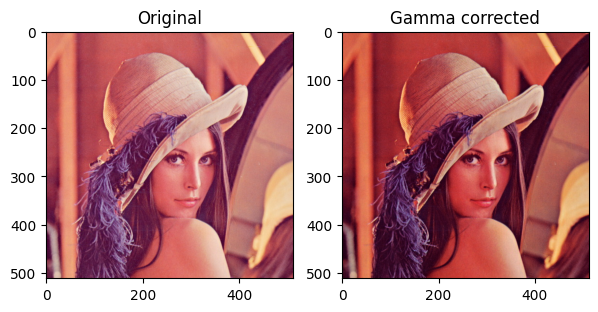

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 1.5

gamma_corrected = np.power(img/255.0, gamma)
gamma_corrected = np.uint8(gamma_corrected*255)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,10))
ax1.set_title('Original')
ax1.imshow(img[:,:,::-1])
ax2.set_title('Gamma corrected')
ax2.imshow(gamma_corrected[:,:,::-1])

cv2.waitKey(0)
cv2.destroyAllWindows()


# Log inverse 

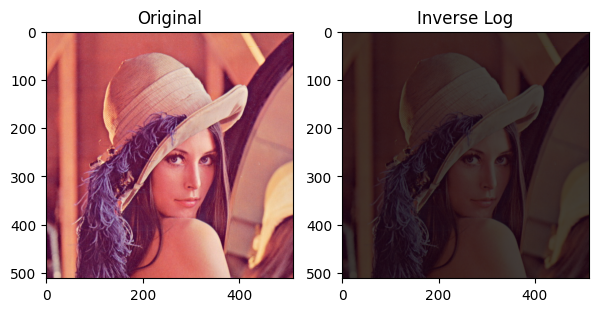

In [4]:
import cv2
import numpy as np

c = 100
inverse_log =np.uint8(c * (np.log(1 + img/255.0)))

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,10))
ax1.set_title('Original')
ax1.imshow(img[:,:,::-1])
ax2.set_title('Inverse Log')
ax2.imshow(inverse_log[:,:,::-1])

cv2.waitKey(0)
cv2.destroyAllWindows()


# Contrast Stretching

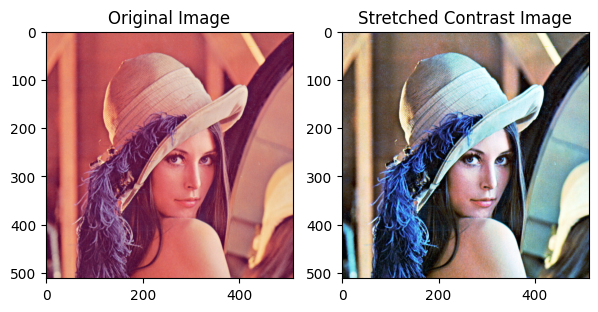

In [5]:
#another way
import cv2

# Load image

# Split image into color channels
b, g, r = cv2.split(im)
# Stretch each color channel separately
b_stretched = cv2.equalizeHist(b)
g_stretched = cv2.equalizeHist(g)
r_stretched = cv2.equalizeHist(r)

# Merge the stretched color channels back into an RGB image
stretched = cv2.merge((b_stretched, g_stretched, r_stretched))

# Display the stretched image
fig, ax = plt.subplots(1, 2, figsize=(7, 10))
ax[0].imshow(im[:,:,::-1])
ax[0].set_title('Original Image')
ax[1].imshow(stretched[:,:,::-1])
ax[1].set_title('Stretched Contrast Image')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


# Gaussian filtering

In [6]:
def flipped(kernal):
    cpy_kernal = kernal.copy()
    for i in range(kernal.shape[0]):
        for j in range(kernal.shape[1]):
            cpy_kernal[i][j] = kernal[kernal.shape[0]-i-1][kernal.shape[1]-j-1]
    return cpy_kernal


def convolve(image,kernal):
    kernal = flipped(kernal)
    img = np.pad(image, (len(kernal)//2, len(kernal)//2), mode='constant')
    cpy_kernal = kernal.copy()
    k_h,k_w = kernal.shape
    im_h,im_w = img.shape
    h=k_h//2
    w=k_w//2
    #print(img.shape)
    res_img = np.zeros(image.shape)
    for i in range(h,im_h-h):
        for j in range(w,im_w-w):
            sum = 0
            for m in range(k_h):
                for n in range(k_w):
                    sum = sum + kernal[m][n]*img[i-h+m][j-w+n]
            res_img[i-h][j-w] = sum
    return res_img

(5, 5)


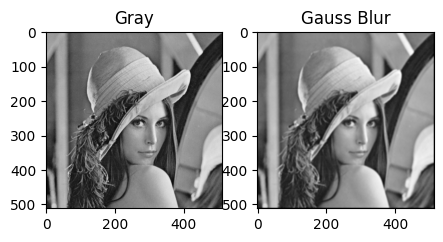

In [7]:
#gaussian blur using user defined function(equation)
def gauss_kernel(kernel_size,sigma):
    kernel=np.zeros((kernel_size,kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - (kernel_size // 2)
            y = j - (kernel_size // 2)
            kernel[i,j] = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    kernel /= np.sum(kernel)
    print(kernel.shape)
    return kernel
def gaussian_blur(image,kernel_sz,sigma):
    kernel = gauss_kernel(kernel_sz,sigma)  
    img = convolve(image,kernel)
    return img

image = gaussian_blur(gsi,5,3.5)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5,10))
ax1.set_title('Gray')
ax1.imshow(gsi,cmap='gray')
ax2.set_title('Gauss Blur')
ax2.imshow(image,cmap='gray')


# Mean filtering

In [8]:
k = np.ones((5,5))/25

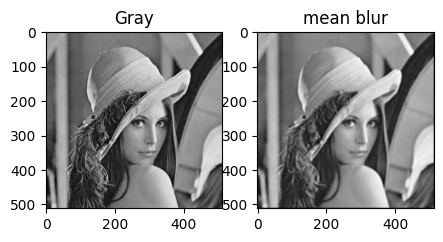

In [9]:
img = convolve(grayImg,k)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5,10))
ax1.set_title("Gray")
ax1.imshow(grayImg,cmap = 'gray')
ax2.set_title("mean blur")
ax2.imshow(img,cmap='gray')

# Median filtering

In [10]:
def median_filter(image, kernel_size):
    height, width = image.shape
    img_padded = np.pad(image, (kernel_size//2, kernel_size//2), mode='constant')
    img_filtered = np.zeros(image.shape)

    for i in range(height):
        for j in range(width):
            kernel_portion = img_padded[i:i+kernel_size, j:j+kernel_size]
            kernel_flattened = kernel_portion.flatten()
            
            sorted_vals = sorted(kernel_flattened)
            mid_index = len(sorted_vals) // 2
            median_value = sorted_vals[mid_index]

            img_filtered[i,j] = median_value
            
    return img_filtered

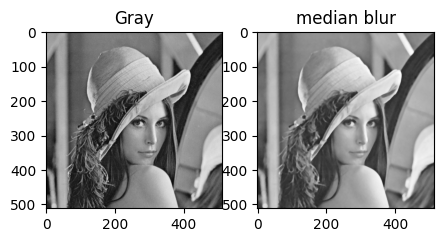

In [11]:
i = median_filter(grayImg,5)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5,10))
ax1.set_title("Gray")
ax1.imshow(grayImg,cmap = 'gray')
ax2.set_title("median blur")
ax2.imshow(i,cmap='gray')

# Laplacian filtering

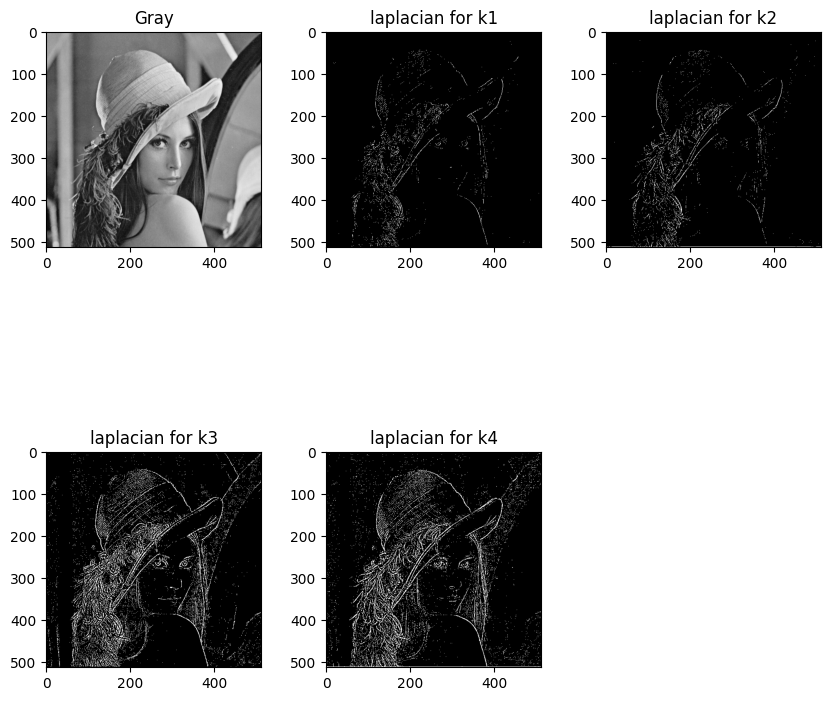

In [12]:
k1 = np.array([[0,1,0],
             [1,-4,1],
             [0,1,0]])
k2 = np.array([[0,-1,0],
             [-1,4,-1],
             [0,-1,0]])
k3 = np.array([[1,1,1],
             [1,-8,1],
             [1,1,1]])
k4 = np.array([[-1,-1,-1],
             [-1,8,-1],
             [-1,-1,-1]])
i1 = convolve(grayImg,k1)
i2 = convolve(grayImg,k2)
i3 = convolve(grayImg,k3)
i4 = convolve(grayImg,k4)

th = 50
i1 = i1 > th
i2 = i2 > th
i3 = i3 > th
i4 = i4 > th

#i5 = cv2.filter2D(grayImg,-1,k1)
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(10,10))

axes[0,0].set_title('Gray')
axes[0,0].imshow(grayImg,cmap='gray')
axes[0,1].set_title('laplacian for k1')
axes[0,1].imshow(i1,cmap='gray')
axes[0,2].set_title('laplacian for k2')
axes[0,2].imshow(i2,cmap='gray')
axes[1,0].set_title('laplacian for k3')
axes[1,0].imshow(i3,cmap='gray')
axes[1,1].set_title('laplacian for k4')
axes[1,1].imshow(i4,cmap='gray')

axes[1,2].set_title('laplacian for k1')
#axes[1,2].imshow(i5,cmap='gray')

fig.subplots_adjust(wspace=0.3)
fig.delaxes(axes[1,2])

# Sobel filtering

In [13]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

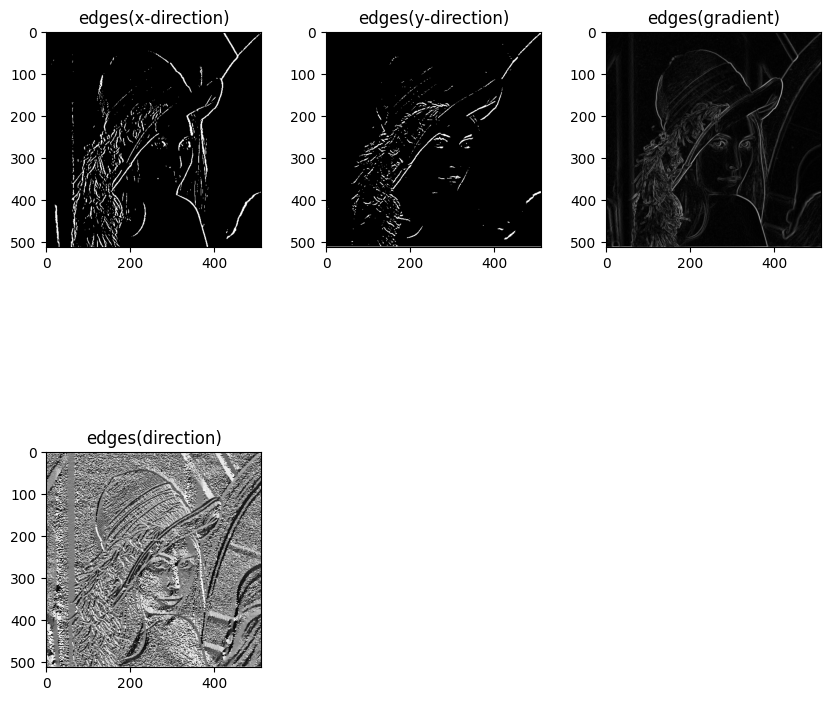

In [14]:
edge_x = convolve(grayImg,sobel_x)
edge_y = convolve(grayImg,sobel_y)

Gm = np.sqrt(edge_x ** 2 + edge_y ** 2)
direction = np.arctan2(edge_y, edge_x)

th = 100
img_x = edge_x>th
img_y = edge_y>th

fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(10,10))

axes[0,0].set_title('edges(x-direction)')
axes[0,0].imshow(img_x,cmap='gray')
axes[0,1].set_title('edges(y-direction)')
axes[0,1].imshow(img_y,cmap='gray')
axes[0,2].set_title('edges(gradient)')
axes[0,2].imshow(Gm,cmap='gray')
axes[1,0].set_title('edges(direction)')
axes[1,0].imshow(direction,cmap='gray')

fig.subplots_adjust(wspace=0.3)
fig.delaxes(axes[1,1])
fig.delaxes(axes[1,2])